# Introvert/Extrovert Dataset Analysis and Model Prediction

# Imports

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV, KFold

%matplotlib inline

# Data Analysis - Overview

Look at the dataset to understand the values of each column and the shape of the dataset

In [2]:
original_df = pd.read_csv(r'RawData\personality_dataset.csv')

In [3]:
original_df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [4]:
original_df.shape

(2900, 8)

In [5]:
# Numeric Data: Time_spent_Alone, Social_event_attendance, Going_outside, Friends_circle_size, Post_frequency
# Categorical Data: Stage_fear, Drained_after_socializing
# Classification Objective: Personality

original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [6]:
# Look at distribution of personalities: Ideally we want an equal distribution, which we have
original_df['Personality'].value_counts()

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

In [7]:
# Split dataset with an 80-20 train-test split
# Training set will further be split during grid search, making a 70-10-20 train-validation-testing split
train_df, test_df = train_test_split(original_df, test_size=0.2, random_state=765)

In [8]:
# This ensures that the distribution of Personality remains equal even after a random split
train_df['Personality'].value_counts()

Personality
Extrovert    1192
Introvert    1128
Name: count, dtype: int64

In [9]:
# This ensures that the distribution of Personality remains equal even after a random split
test_df['Personality'].value_counts()

Personality
Extrovert    299
Introvert    281
Name: count, dtype: int64

# Data Analysis - Analyze Columns

## Numeric Data 
- Descriptions from the original post on [Kaggle](https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data)
    - Time_spent_Alone: Hours spent daily (0-11).
    - Social_event_attendance: Frequency of social events (0-10).
    - Going_outside: Frequency of going outside (0-7).
    - Friends_circle_size: Number of close friends (0-15)
    - Post_frequency: Social media post frequency (0-10)
- Trends from graphs:
    - General: 
        - Null values exist for each column. Additionally, in each column, the amount of introverts with null values roughly equals to amount of extroverts with null values
        - Each column has clear divisions between extroverts and introverts
    - Social_event_attendance: Introverts typically fall within 0-3 while extroverts fall within 4-10
    - Going_outside: Introverts typically fall within 0-2 while extroverts fall within 3-7
    - Friends_circle_size: Introverts typicall fall within 0-5 while extroverts fall within 6-15
    - Post_frequency: Introverts typicall fall within 0-2 while extroverts fall within 3-10
- All variables have a strong linear correlation with eachother. This is typically bad, but do to the clear split between introverts and extroverts, the variables will be kept (at least for inital runs).

[]

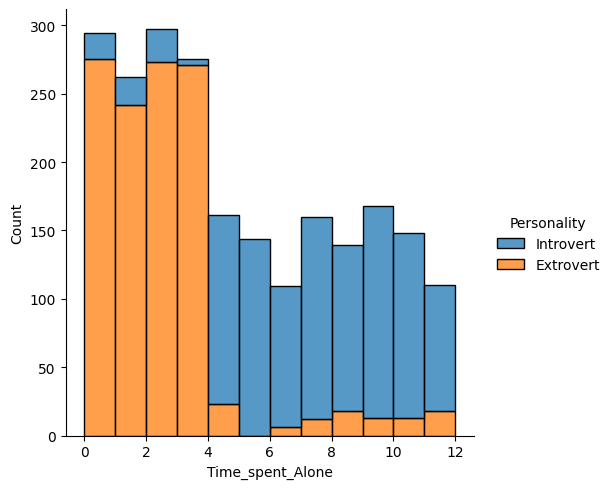

In [10]:
# Plotting out Time spent alone in terms of personality
sns.displot(train_df, x='Time_spent_Alone', hue='Personality', bins=range(13), kind='hist', multiple='stack')
plt.plot()

In [11]:
train_df.groupby(by='Time_spent_Alone', dropna=False, as_index=False)['Personality'].value_counts()

,Time_spent_Alone,Personality,count
0,0.0,Extrovert,275
1,0.0,Introvert,19
2,1.0,Extrovert,242
3,1.0,Introvert,20
4,2.0,Extrovert,273
5,2.0,Introvert,24
6,3.0,Extrovert,271
7,3.0,Introvert,4
8,4.0,Introvert,138
9,4.0,Extrovert,23


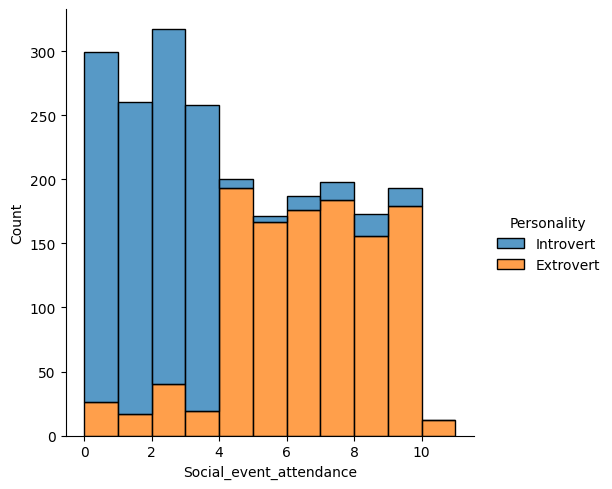

In [12]:
sns.displot(train_df, x='Social_event_attendance', hue='Personality', bins=range(12), kind='hist', multiple='stack')

In [13]:
train_df.groupby(by='Social_event_attendance', dropna=False, as_index=False)['Personality'].value_counts()

,Social_event_attendance,Personality,count
0,0.0,Introvert,273
1,0.0,Extrovert,26
2,1.0,Introvert,243
3,1.0,Extrovert,17
4,2.0,Introvert,277
5,2.0,Extrovert,40
6,3.0,Introvert,239
7,3.0,Extrovert,19
8,4.0,Extrovert,193
9,4.0,Introvert,7


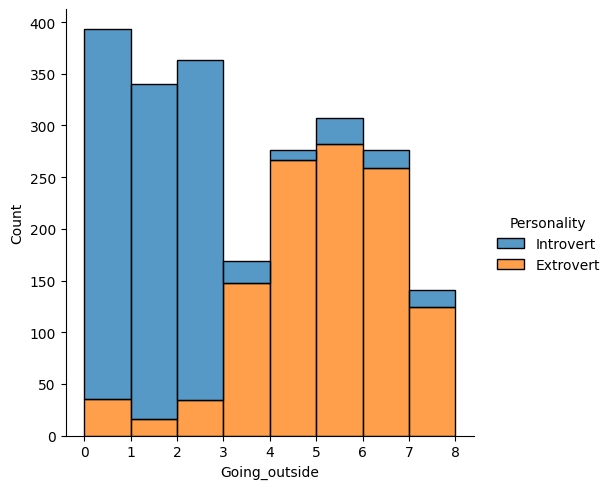

In [14]:
sns.displot(train_df, x='Going_outside', hue='Personality', bins=range(9), kind='hist', multiple='stack')

In [15]:
train_df.groupby(by='Going_outside', dropna=False, as_index=False)['Personality'].value_counts()

,Going_outside,Personality,count
0,0.0,Introvert,358
1,0.0,Extrovert,35
2,1.0,Introvert,324
3,1.0,Extrovert,16
4,2.0,Introvert,329
5,2.0,Extrovert,34
6,3.0,Extrovert,148
7,3.0,Introvert,21
8,4.0,Extrovert,267
9,4.0,Introvert,9


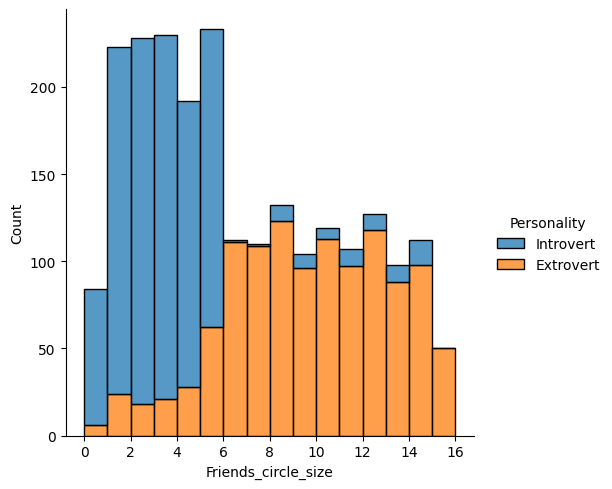

In [16]:
sns.displot(train_df, x='Friends_circle_size', hue='Personality', bins=range(17), kind='hist', multiple='stack')

In [17]:
train_df.groupby(by='Friends_circle_size', dropna=False, as_index=False)['Personality'].value_counts()

,Friends_circle_size,Personality,count
0,0.0,Introvert,78
1,0.0,Extrovert,6
2,1.0,Introvert,199
3,1.0,Extrovert,24
4,2.0,Introvert,210
5,2.0,Extrovert,18
6,3.0,Introvert,209
7,3.0,Extrovert,21
8,4.0,Introvert,164
9,4.0,Extrovert,28


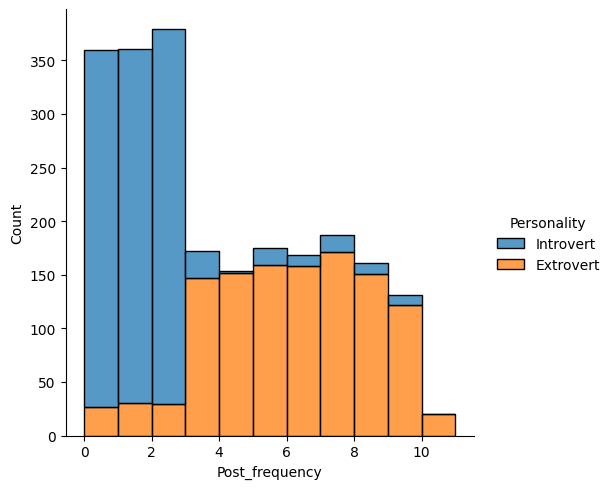

In [18]:
sns.displot(train_df, x='Post_frequency', hue='Personality', bins=range(12), kind='hist', multiple='stack')

In [19]:
train_df.groupby(by='Post_frequency', dropna=False, as_index=False)['Personality'].value_counts()

,Post_frequency,Personality,count
0,0.0,Introvert,333
1,0.0,Extrovert,27
2,1.0,Introvert,331
3,1.0,Extrovert,30
4,2.0,Introvert,350
5,2.0,Extrovert,29
6,3.0,Extrovert,147
7,3.0,Introvert,25
8,4.0,Extrovert,152
9,4.0,Introvert,2


<Axes: >

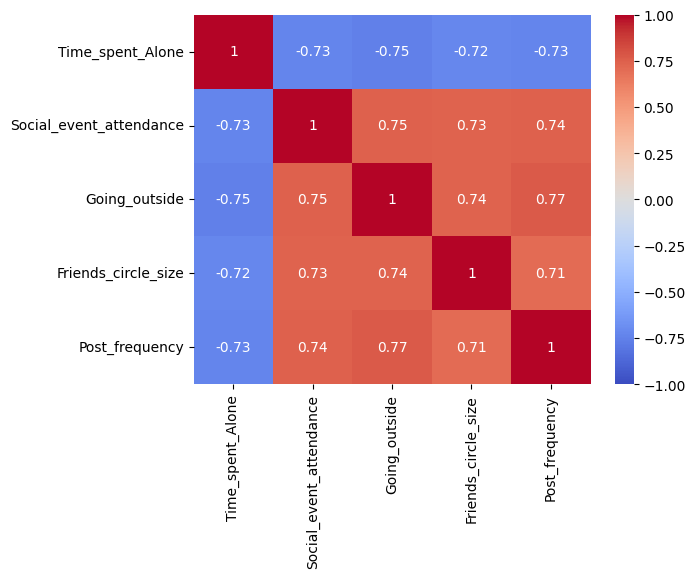

In [ ]:
corr_matrix = train_df[['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']].corr()
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')

## Categorical Data 
- Descriptions from the Original
    - Stage_fear: Presence of stage fright (Yes/No)
    - Drained_after_socializing: Feeling drained after socializing (Yes/No)
- Trends:
    - General Trends:
        - The amount of extroverts with null values roughly equals the amount of introverts with null values
    - Stage_fear: Extroverts dominate the no category while introverts dominate the yes category
    - Drained_after_socializing: Extroverts dominate the no category while introverts dominate the yes category

In [21]:
train_df.groupby(by='Stage_fear', dropna=False)['Personality'].value_counts()

Stage_fear  Personality
No          Extrovert      1076
            Introvert        68
Yes         Introvert      1032
            Extrovert        86
NaN         Extrovert        30
            Introvert        28
Name: count, dtype: int64

In [22]:
train_df.groupby(by='Drained_after_socializing', dropna=False)['Personality'].value_counts()

Drained_after_socializing  Personality
No                         Extrovert      1092
                           Introvert        68
Yes                        Introvert      1035
                           Extrovert        86
NaN                        Introvert        25
                           Extrovert        14
Name: count, dtype: int64

# General Modelling
- Results:
    - I tested an SVC, a KNeighborsClassifier, a LogisticRegression Classifier, and a DecisionTreeClassifier from sklearn. The first three were chosen to see if I can exploit the data's clear division between introverts and extroverts. The last was chosen for breadth. Each model was trained with a KFold grid search.
    - All numeric columns and all categorical columns were kept and funelled through a column transformer.
        - For numeric columns, the column transformer filled missing values with the average value
        - For categorical columns, the column transformer filled missing values with 'Blank' before organizing the column values into an ordinal encoding that assigns each value a number (No gets 0, Blank gets 1, and Yes gets 2)
    - At the end, each model's testing set performance was evaluated with a confusion matrix and analysis of accuracy, precision, and recall.
        - Overall, each model performed similarly to one another in terms of accuracy, precision, and recall.
        - The SVC and DecisionTreeClassifier has the best accuracy, precision, and recall, performing exactly the same
        - LogisiticRegression has the second best accuracy and precision while the KNeighborsClassifier had the worst accuracy and precision (although this is not to say KNeighborsClassifier did poorly).
        - All models shared the exact same recall score.


In [23]:
# Splitting
train_x, train_y = train_df.drop(columns='Personality'), train_df['Personality']
test_x, test_y = test_df.drop(columns='Personality'), test_df['Personality']

In [24]:
# Define Pipeline for numeric columns
numeric_columns = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
numeric_pipeline = Pipeline(steps=[
    ('Numeric Imputer', SimpleImputer(strategy='mean'))
])
# Define Pipeline for categorical columns
categorical_columns = ['Stage_fear', 'Drained_after_socializing']
categorical_pipeline = Pipeline(steps=[
    ('Categorical Imputer', SimpleImputer(strategy='constant', fill_value='Blank')),
    ('Ordinal Encoder', OrdinalEncoder(categories=[['No', 'Blank', 'Yes'], ['No', 'Blank', 'Yes']])),
])

In [25]:
# Apply Column Transformer
col_transformer = ColumnTransformer(transformers=[
    ('Numeric Pipeline', numeric_pipeline, numeric_columns),
    ('Categorical Pipeline', categorical_pipeline, categorical_columns),
], remainder='drop', n_jobs=-1)

In [26]:
# Define Models and Pipelines
svc_parameters = {
    'C': [0.1, 0.5, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [3, 4, 5],
}
svc_classifier = GridSearchCV(SVC(), svc_parameters, cv=KFold(8), n_jobs=-1)
svc_pipeline = make_pipeline(col_transformer, svc_classifier)

kneighbors_parameters = {
    'n_neighbors': [1, 3, 5, 7],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform', 'distance'],
}
kneighbors_classifier = GridSearchCV(KNeighborsClassifier(), kneighbors_parameters, cv=KFold(8), n_jobs=-1)
kneighbors_pipeline = make_pipeline(col_transformer, kneighbors_classifier)

decision_tree_parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 3, 4]
}
decision_tree_classifer = GridSearchCV(DecisionTreeClassifier(), decision_tree_parameters, cv=KFold(8), n_jobs=-1)
decision_tree_pipeline = make_pipeline(col_transformer, decision_tree_classifer)


lc_parameters = {
    'penalty': [None, 'l2'],
    'C': [0.5, 1, 2],
}
lc_classifier = GridSearchCV(LogisticRegression(), param_grid=lc_parameters, cv=KFold(8), n_jobs=-1)
lc_pipeline = make_pipeline(col_transformer, lc_classifier)

In [27]:
# Train Model
svc_pipeline.fit(train_x, train_y)

,steps,"[('columntransformer', ...), ('gridsearchcv', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Numeric Pipeline', ...), ('Categorical Pipeline', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


SVC Accuracy (TP + TN) / (TP + TN + FT + FN): 0.9379
SVC Precision (TP) / (TP + FP): 0.9614
SVC Recall (TP) / (TP + FN): 0.9164


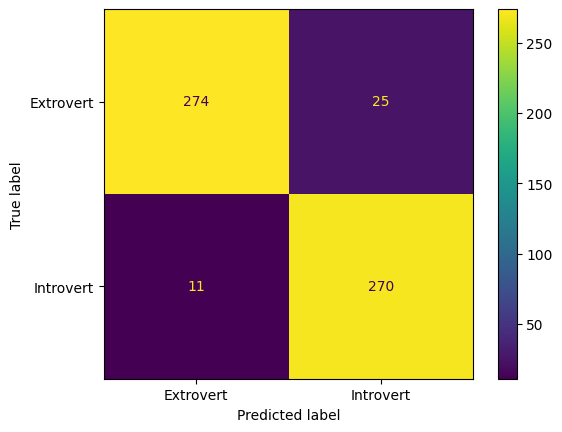

In [28]:
# Results
svc_predictions = svc_pipeline.predict(test_x)
svc_accuracy = accuracy_score(test_y, svc_predictions)
svc_precision = precision_score(test_y, svc_predictions, pos_label='Extrovert')
svc_recall = recall_score(test_y, svc_predictions, pos_label='Extrovert')

svc_confusion_matrix = confusion_matrix(test_y, svc_predictions, labels=['Extrovert', 'Introvert'])

print(f'SVC Accuracy (TP + TN) / (TP + TN + FT + FN): {svc_accuracy:0.4f}')
print(f'SVC Precision (TP) / (TP + FP): {svc_precision:0.4f}')
print(f'SVC Recall (TP) / (TP + FN): {svc_recall:0.4f}')

disp = ConfusionMatrixDisplay(svc_confusion_matrix, display_labels=['Extrovert', 'Introvert'])
disp.plot()


In [29]:
# Train Model
kneighbors_pipeline.fit(train_x, train_y)

,steps,"[('columntransformer', ...), ('gridsearchcv', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Numeric Pipeline', ...), ('Categorical Pipeline', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


KNeighbors Accuracy (TP + TN) / (TP + TN + FT + FN): 0.9293
KNeighbors Precision (TP) / (TP + FP): 0.9448
KNeighbors Recall (TP) / (TP + FN): 0.9164


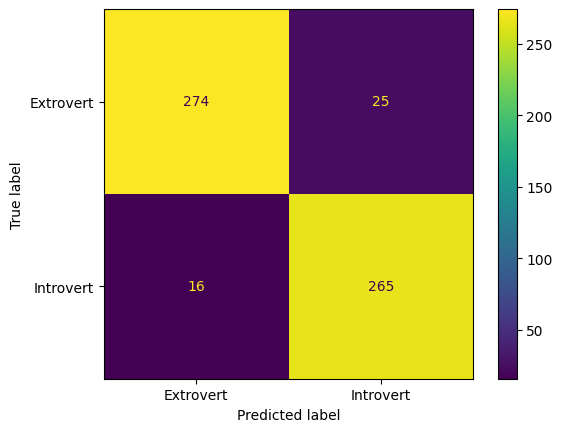

In [30]:
# Results
kneighbors_predictions = kneighbors_pipeline.predict(test_x)
kneighbors_accuracy = accuracy_score(test_y, kneighbors_predictions)
kneighbors_precision = precision_score(test_y, kneighbors_predictions, pos_label='Extrovert')
kneighbors_recall = recall_score(test_y, kneighbors_predictions, pos_label='Extrovert')

kneighbors_confusion_matrix = confusion_matrix(test_y, kneighbors_predictions, labels=['Extrovert', 'Introvert'])

print(f'KNeighbors Accuracy (TP + TN) / (TP + TN + FT + FN): {kneighbors_accuracy:0.4f}')
print(f'KNeighbors Precision (TP) / (TP + FP): {kneighbors_precision:0.4f}')
print(f'KNeighbors Recall (TP) / (TP + FN): {kneighbors_recall:0.4f}')

disp = ConfusionMatrixDisplay(kneighbors_confusion_matrix, display_labels=['Extrovert', 'Introvert'])
disp.plot()

In [31]:
# Train Model
decision_tree_pipeline.fit(train_x, train_y)

,steps,"[('columntransformer', ...), ('gridsearchcv', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Numeric Pipeline', ...), ('Categorical Pipeline', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Decision Tree Accuracy (TP + TN) / (TP + TN + FT + FN): 0.9379
Decision Tree Precision (TP) / (TP + FP): 0.9614
Decision Tree Recall (TP) / (TP + FN): 0.9164


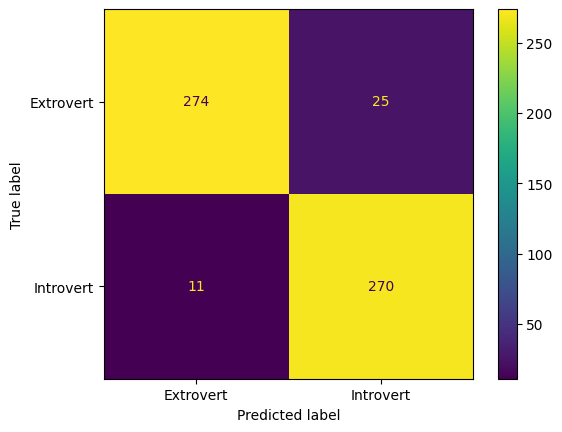

In [32]:
# Results
decision_tree_predictions = decision_tree_pipeline.predict(test_x)
decision_tree_accuracy = accuracy_score(test_y, decision_tree_predictions)
decision_tree_precision = precision_score(test_y, decision_tree_predictions, pos_label='Extrovert')
decision_tree_recall = recall_score(test_y, decision_tree_predictions, pos_label='Extrovert')

decision_tree_confusion_matrix = confusion_matrix(test_y, decision_tree_predictions, labels=['Extrovert', 'Introvert'])

print(f'Decision Tree Accuracy (TP + TN) / (TP + TN + FT + FN): {decision_tree_accuracy:0.4f}')
print(f'Decision Tree Precision (TP) / (TP + FP): {decision_tree_precision:0.4f}')
print(f'Decision Tree Recall (TP) / (TP + FN): {decision_tree_recall:0.4f}')

disp = ConfusionMatrixDisplay(decision_tree_confusion_matrix, display_labels=['Extrovert', 'Introvert'])
disp.plot()

In [33]:
# Train Model
lc_pipeline.fit(train_x, train_y)

,steps,"[('columntransformer', ...), ('gridsearchcv', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Numeric Pipeline', ...), ('Categorical Pipeline', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Logistic Regression Accuracy (TP + TN) / (TP + TN + FT + FN): 0.9345
Logistic Regression Precision (TP) / (TP + FP): 0.9547
Logistic Regression Recall (TP) / (TP + FN): 0.9164


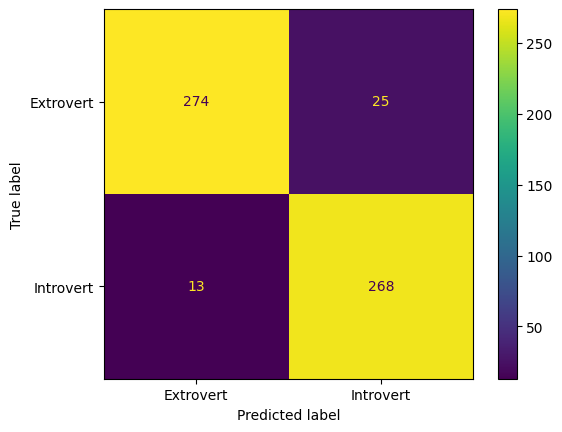

In [34]:
# Results
lc_predictions = lc_pipeline.predict(test_x)
lc_accuracy = accuracy_score(test_y, lc_predictions)
lc_precision = precision_score(test_y, lc_predictions, pos_label='Extrovert')
lc_recall = recall_score(test_y, lc_predictions, pos_label='Extrovert')

lc_confusion_matrix = confusion_matrix(test_y, lc_predictions, labels=['Extrovert', 'Introvert'])

print(f'Logistic Regression Accuracy (TP + TN) / (TP + TN + FT + FN): {lc_accuracy:0.4f}')
print(f'Logistic Regression Precision (TP) / (TP + FP): {lc_precision:0.4f}')
print(f'Logistic Regression Recall (TP) / (TP + FN): {lc_recall:0.4f}')

disp = ConfusionMatrixDisplay(lc_confusion_matrix, display_labels=['Extrovert', 'Introvert'])
disp.plot()

In [35]:
# Metrics
metrics_dict = {'SVC': {'Accuracy': svc_accuracy, 'Precision': svc_precision, 'Recall': svc_recall},
                 'KNeighborsClassifier': {'Accuracy': kneighbors_accuracy, 'Precision': kneighbors_precision, 'Recall': kneighbors_recall},
                 'DecisionTreeClassifier': {'Accuracy': decision_tree_accuracy, 'Precision': decision_tree_precision, 'Recall': decision_tree_recall},
                 'LogisiticRegression': {'Accuracy': lc_accuracy, 'Precision': lc_precision, 'Recall': lc_recall},
                }
metrics_df = pd.DataFrame(metrics_dict).T.reset_index(names='Model')
metrics_df

,Model,Accuracy,Precision,Recall
0,SVC,0.937931,0.961404,0.916388
1,KNeighborsClassifier,0.929310,0.944828,0.916388
2,DecisionTreeClassifier,0.937931,0.961404,0.916388
3,LogisiticRegression,0.934483,0.954704,0.916388


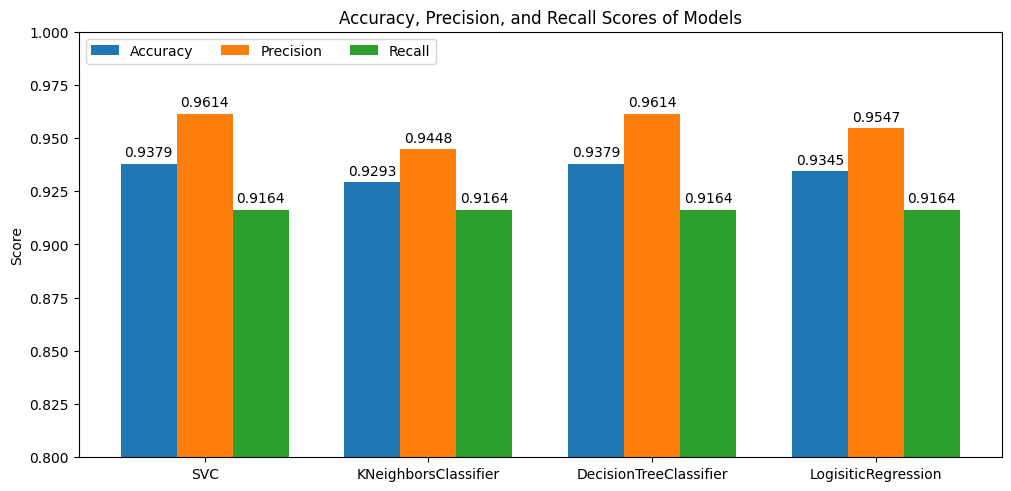

In [ ]:
x = np.arange(len(metrics_df['Model']))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=[10, 4.8])
for measurement in ('Accuracy', 'Precision', 'Recall'):
    offset = width*multiplier
    rects= ax.bar(x + offset, metrics_df[measurement], width, label=measurement)
    ax.bar_label(rects, padding=3, fmt="{:0.4f}")
    multiplier += 1

ax.set_ylabel('Score')
ax.set_title('Accuracy, Precision, and Recall Scores of Models On Testing Set')
ax.set_xticks(x + width, metrics_df['Model'])
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0.8, 1)

plt.show()
fig.savefig('ModelResults.png')